# Classification Model with boolean variables

The objective of this Notebook is to create a `Logistic Regression` model to predict *Hearth Disease* (boolean variable), using anothers boolean variables. 

**We want to find what are the most influential factors in having a heart attack in the representative sample of people in the U.S.**

**Hamming Distance** will be used as metric to evaluate the performance of the model.

## Why Hamming Distance as a performance Metric?

Is a metric that is used to evaluate the performance of classification models when they use binary (boolean) variables. The result of this distance is interpreted as the number of observations that were bad classificated by the prediction of the model.

The `Hamming Distance` is the count of the numbers of modifications that needs to be applied in a `vectorX` to be equals to the `vectorY`.

The function `Hamming_loss` of the library scikt-learn, calculate the Hamming distance between `y_predict` and `y_test`(number of bad classifications) divided by the total of observations in `y_test`.

## The dataset.

For this case a dataset with 319.795 observations called ***Personal Key Indicators of Heart Disease*** is used, wich cointains 9 boolean variables related with HeartDesease. The dataset was taken from this website: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease and came from the **Centers for Disease Control and Prevention**, wich conduct surverys to U.S. residents. Each column represent a variable and each row represent an person who answer the survery.

**Variables Description**

The description oh those variables, are the question made in the survery.

**1. HeartDisease:** Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

**2.Smoking:** Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

**3.AlcoholDrinking:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

**4.Stroke:** (Ever told) (you had) a stroke?

**5.DiffWalking:** Do you have serious difficulty walking or climbing stairs?

**6.Sex:** Are you male or female?

**7.Asthma:** (Ever told) (you had) asthma?

**8.KidneyDisease:** Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

**9.SkinCancer:** (Ever told) (you had) skin cancer?

The values of "Yes" will be replaced for 1, and the values of "No" will be replaced for 0.

In the case of `Sex`, "Male" will be replaced for 1 and "Female" will be replaced for 0.

## Importing libraries, reading and exploring the data

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay, hamming_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler

import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier


In [3]:
df=pd.read_csv("heart_2020_cleaned.csv")
df=df[["HeartDisease","Smoking","AlcoholDrinking","Stroke","Sex","DiffWalking",
       "Asthma","KidneyDisease","SkinCancer"]] #Filtering columns
df.replace({"Yes":1,"No":0,"Male":1,"Female":0},inplace=True) #Replacing strings for 1 and 0
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,Sex,DiffWalking,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,0,1,0,1
1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0


In [4]:
df.shape

(319795, 9)

In [5]:
for var in df.columns:
    print(df[[var]].value_counts())

HeartDisease
0               292422
1                27373
Name: count, dtype: int64
Smoking
0          187887
1          131908
Name: count, dtype: int64
AlcoholDrinking
0                  298018
1                   21777
Name: count, dtype: int64
Stroke
0         307726
1          12069
Name: count, dtype: int64
Sex
0      167805
1      151990
Name: count, dtype: int64
DiffWalking
0              275385
1               44410
Name: count, dtype: int64
Asthma
0         276923
1          42872
Name: count, dtype: int64
KidneyDisease
0                308016
1                 11779
Name: count, dtype: int64
SkinCancer
0             289976
1              29819
Name: count, dtype: int64


In [6]:
df.describe()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,Sex,DiffWalking,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,0.412477,0.068097,0.037740,0.475273,0.138870,0.134061,0.036833,0.093244
std,0.279766,0.492281,0.251912,0.190567,0.499389,0.345812,0.340718,0.188352,0.290775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting the data into train and test 

In [15]:
# Spliting data into training and test

# Define the target variable (Variable_5) and features (other variables)
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']


X_train,X_test=train_test_split(X,test_size=0.2,random_state=2)
y_train,y_test=train_test_split(y,test_size=0.2,random_state=2)

## Building different Classification models and comparing them based on Hamming Distance

In [16]:
df.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'Sex',
       'DiffWalking', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Accorging to hamming distance there are 5410 observations bad classificated of 63959 
That means the accuracy is 0.9154145624540722 (1-0.08458543754592786)

Validating with sklearn calculation
Hamming loss  0.08458543754592786
Accuracy  0.9154145624540722
255836

Confusion matrix, without normalization
[[58216   314]
 [ 5096   333]]


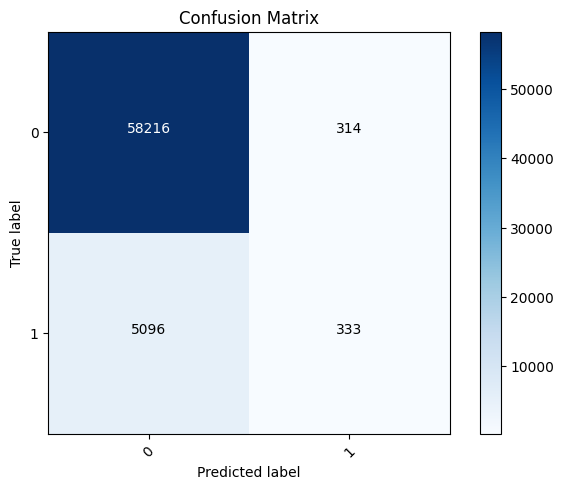

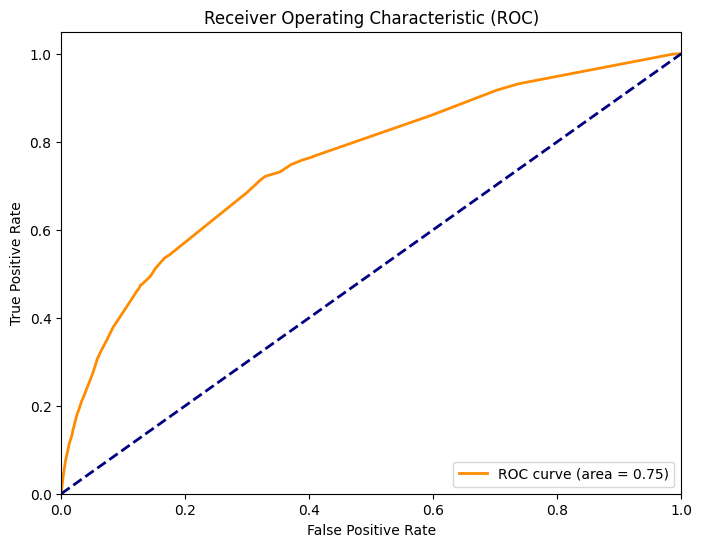

In [39]:

model = LogisticRegression(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculating Hamming distance for predictions

#Manual calculation
hamming_dist = np.sum(np.abs(y_pred-y_test))
accuracy=1-(hamming_dist/len(y_test))


# Print the Hamming distance for each model
print(f'Accorging to hamming distance there are {hamming_dist} observations bad classificated of {len(y_test)} \nThat means the accuracy is {accuracy} (1-{(hamming_dist/len(y_test))})')
print("\nValidating with sklearn calculation\nHamming loss ",hamming_loss(y_test,y_pred))
print("Accuracy ",model.score(X_test,y_test))
print(len(model.predict_proba(X_train)))

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

import itertools

class_names = [0, 1]  # Replace with your class labels
plot_confusion_matrix(confusion, classes=class_names, title='Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve with AUC score
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()




##### It's evident that the model is able to clasificate a person who wont have a Hearth Disease, but is very bad predicting when a person will have a Hearth Disease.

## Creating a model with all the data to find the most relevant factors in HearthDiseases

In [24]:
#fit logistic regression model
model = smf.logit('HeartDisease ~ Smoking + AlcoholDrinking + Stroke + Sex +\
                  DiffWalking +Asthma + KidneyDisease + SkinCancer', data=df).fit()

#view model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.256764
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:               319795
Model:                          Logit   Df Residuals:                   319786
Method:                           MLE   Df Model:                            8
Date:                Sat, 30 Sep 2023   Pseudo R-squ.:                  0.1214
Time:                        17:26:29   Log-Likelihood:                -82112.
converged:                       True   LL-Null:                       -93453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.4889      0.014   -246.606      0.000      -3.517      -3.461
Smoking       

## Conclusion.

Tt can be concluded that the most relevant variables for a person to have a heart disease are: `Stroke`, `DiffWalking` and `KidneyDisease`